In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load datasets
train_df = pd.read_csv("../data/train.csv", index_col="PassengerId")
test_df = pd.read_csv("../data/test.csv", index_col="PassengerId")

# Break train_df into X, y
train_X, train_y = train_df.drop("Survived", axis=1), train_df["Survived"]

# Make a copy of test_df
test_X = test_df.copy()

In [3]:
# Check shape of train_X and test_X
print(f"train_X shape : {train_X.shape}")
print(f"test_X shape : {test_X.shape}")

train_X shape : (891, 10)
test_X shape : (418, 10)


In [4]:
# Check info of train_X
train_X_info = pd.DataFrame({
    "missing_sum": train_X.isna().sum(),
    "missing_percent": train_X.isna().sum() / len(train_X) * 100,
    "dtypes": train_X.dtypes,
    **train_X.describe().T,
    **train_X.describe(include="object").T
}).sort_values(by="missing_sum")

train_X_info

,missing_sum,missing_percent,dtypes,count,mean,std,min,25%,50%,75%,max,unique,top,freq
Fare,0,0.000000,float64,NaN,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,NaN,NaN,NaN
Name,0,0.000000,object,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891,"Braund, Mr. Owen Harris",1
Parch,0,0.000000,int64,NaN,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,NaN,NaN,NaN
Pclass,0,0.000000,int64,NaN,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,NaN,NaN,NaN
Sex,0,0.000000,object,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,male,577
SibSp,0,0.000000,int64,NaN,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,NaN,NaN,NaN
Ticket,0,0.000000,object,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681,347082,7
Embarked,2,0.224467,object,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,S,644
Age,177,19.865320,float64,NaN,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,NaN,NaN,NaN
Cabin,687,77.104377,object,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147,B96 B98,4


**Plan:**

- `Fare` : use `StandardScaler`
- `Name` : drop
- `Parch` : use `Stand`

In [5]:
# Check info of test_X
test_X_info = pd.DataFrame({
    "missing_sum": test_X.isna().sum(),
    "missing_percent": test_X.isna().sum() / len(test_X) * 100,
    "dtypes": test_X.dtypes,
    **test_X.describe().T,
    **test_X.describe(include="object").T
}).sort_values(by="missing_sum")

test_X_info

,missing_sum,missing_percent,dtypes,count,mean,std,min,25%,50%,75%,max,unique,top,freq
Embarked,0,0.000000,object,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,S,270
Name,0,0.000000,object,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,418,"Kelly, Mr. James",1
Parch,0,0.000000,int64,NaN,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000,NaN,NaN,NaN
Pclass,0,0.000000,int64,NaN,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000,NaN,NaN,NaN
Sex,0,0.000000,object,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,male,266
SibSp,0,0.000000,int64,NaN,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000,NaN,NaN,NaN
Ticket,0,0.000000,object,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363,PC 17608,5
Fare,1,0.239234,float64,NaN,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292,NaN,NaN,NaN
Age,86,20.574163,float64,NaN,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000,NaN,NaN,NaN
Cabin,327,78.229665,object,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,B57 B59 B63 B66,3


## 1. Exploratory Data Analysis (EDA)

### 1.1 Univariate Analysis

We are assuming that the training and testing datasets come from the same distribution. As such will only perform data visualizations and analysis on the training data.

In this section, we will examine in more depth each feature in the dataset.

In [6]:
# Make a copy of the original train_df that includes the target variable Survived
df = train_df.copy()

#### 1.1.1 Numeric Features

In [7]:
df.select_dtypes(include="number").columns.values

array(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype=object)

In [200]:
# Check Age feature
print(f"Feature : Age")
print("-------------")
print(f"Missing values : {df['Age'].isna().sum()}")

Feature : Age
-------------
Missing values : 177


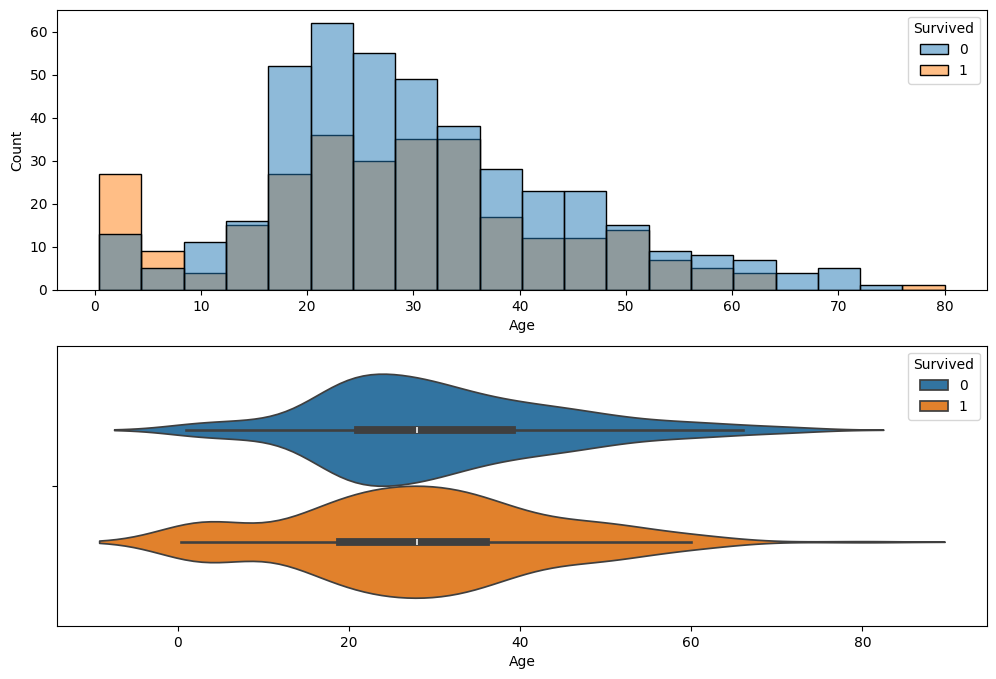

In [210]:
# Check distribution of Age
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.histplot(df, x="Age", hue="Survived", ax=axes[0])
sns.violinplot(df, x="Age", hue="Survived", ax=axes[1])
plt.show()

**Obervation:** The `Age` features has a slight right-skewness, but nearly follows a Gaussian distribution as expected. 

**Insight:** 

**Action:**

In [201]:
# Check Pclass feature
print(f"Feature : Pclass")
print("----------------")
print(f"Missing values : {df['Pclass'].isna().sum()}")

Feature : Pclass
----------------
Missing values : 0


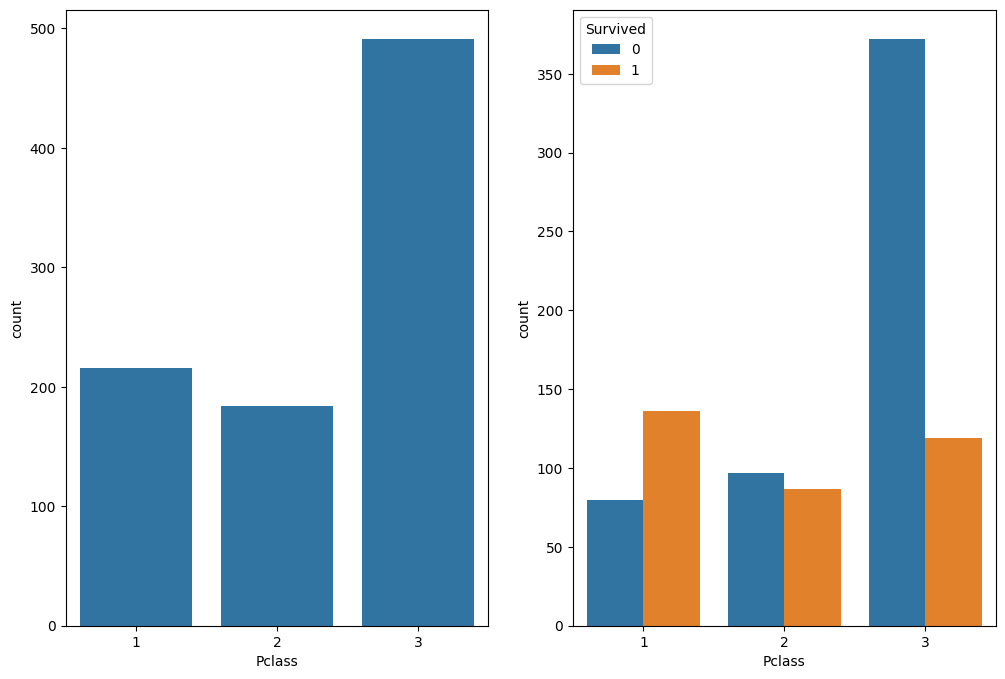

In [151]:
# Check distribution of PClass
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
sns.countplot(df, x="Pclass", ax=axes[0])
sns.countplot(df, x="Pclass", hue="Survived", ax=axes[1])
plt.show()

**Observation:** The `PClass` feature 

**Insight:**

**Action:**

In [202]:
# Check Fare feature
print(f"Feature : Fare")
print("--------------")
print(f"Missing values : {df['Fare'].isna().sum()}")

Feature : Fare
--------------
Missing values : 0


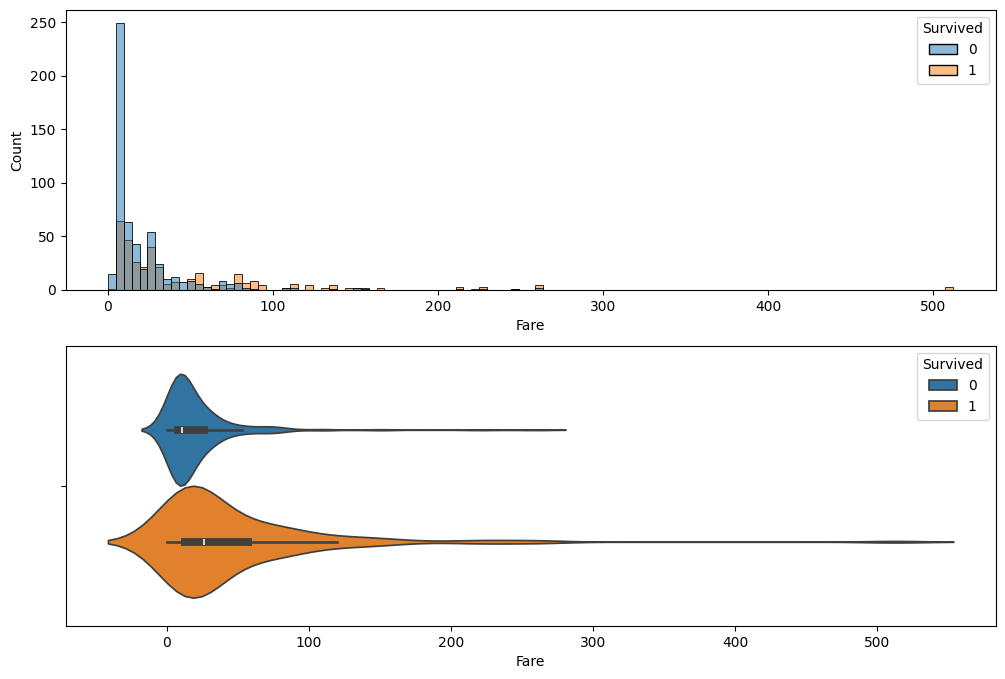

In [208]:
# Check distribution of Fare
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.histplot(df, x="Fare", hue="Survived", ax=axes[0])
sns.violinplot(df, x="Fare", hue="Survived", ax=axes[1])
plt.show()

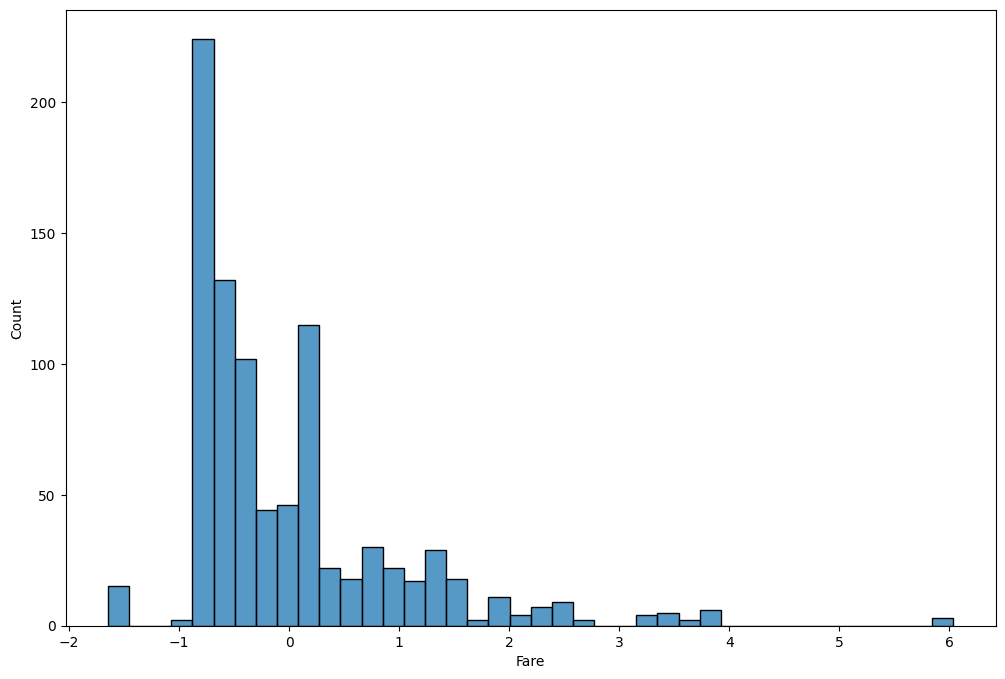

In [110]:
# Check distribution after squishing and standardizing the values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
fares = df["Fare"] ** 0.5
fares = (fares - fares.mean()) / fares.std()
sns.histplot(fares, ax=ax)
plt.show()

**Observation:** The `Fare` feature has a large right-skewness with the majority of the density appearing between the range of 0-30. There are also extreme outliers near 500 and each of those passengers survived. After squishing and standardizing the values, we still see an extreme right-skewness.

**Action:** Let us examine the high paying passengers to see if we can gather any insights behind these outlier values.

In [111]:
# Check the top 10 highest paying passengers
df.loc[df["Fare"].sort_values(ascending=False)[:10].index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,5
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,5
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4


**Observation:** Interestingly, many of these passengers have the same `Ticket` value, embarked from the same location, and have the same fare price.

**Insight:** The high fare price for these passengers may be due to a combined purchase. Namely, the fare price is for all passengers who share the same ticket. On the other hand, the high fare price may also be due to other factors, such as `Pclass`, `Cabin`, `Embarked` or other latent and unknown features.

**Action:** A first-step and simple approach to remedy the issue of outliers in the `Fare` feature is to *squish and standardize* the value. Otherwise, we need to examine the following multivariate features before taking a more advanced and concrete action - (`Fare`, `Ticket`), (`Fare`, `Pclass`).

In [204]:
# Check SibSp and Parch features
print(f"Feature : SibSp")
print("---------------")
print(f"Missing values : {df['SibSp'].isna().sum()}")
print("===============")
print(f"Feature : Parch")
print("---------------")
print(f"Missing values : {df['Parch'].isna().sum()}")

Feature : SibSp
---------------
Missing values : 0
Feature : Parch
---------------
Missing values : 0


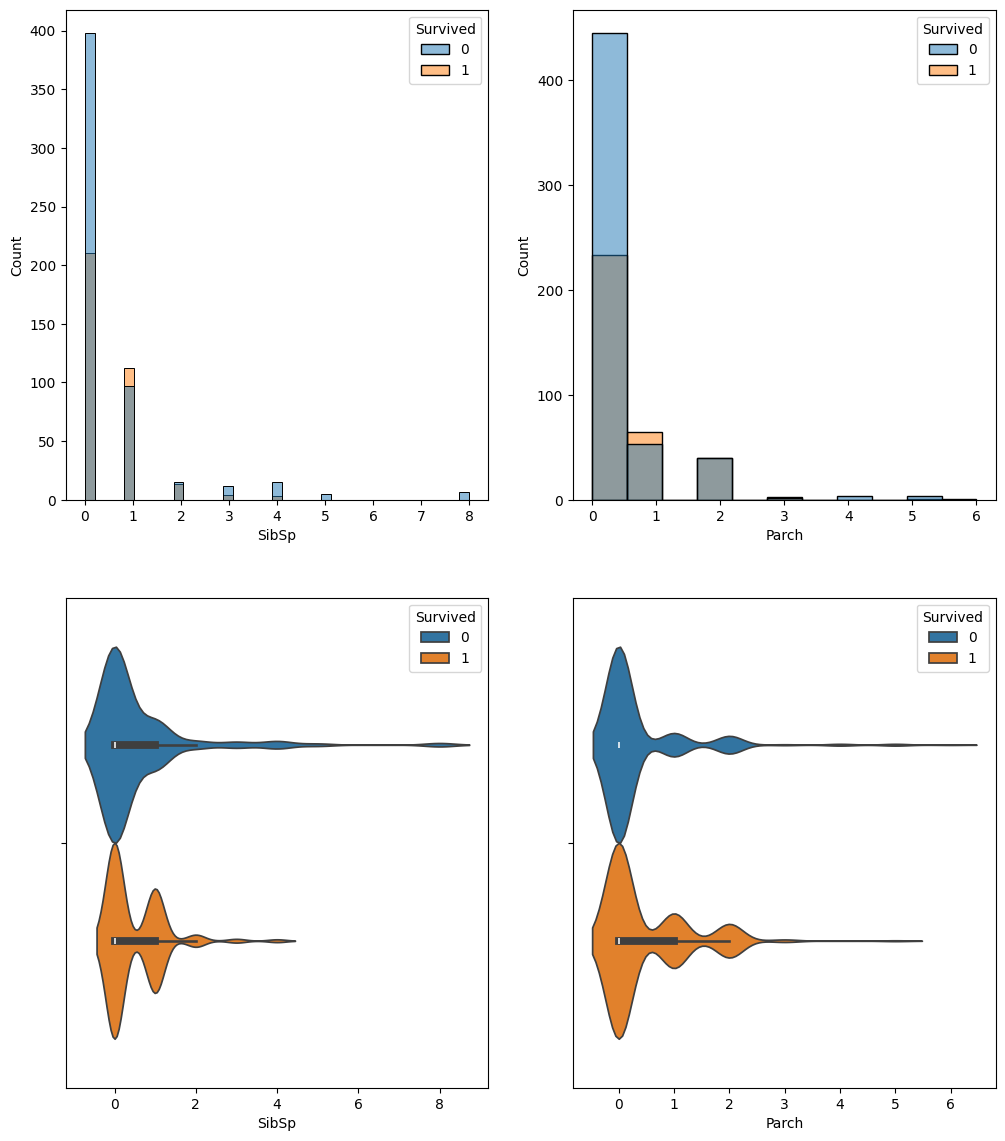

In [214]:
# Check distributions of SibSp and Parch
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 14))
sns.histplot(df, x="SibSp", hue="Survived", ax=axes[0, 0])
sns.violinplot(df, x="SibSp", hue="Survived", ax=axes[1, 0])
sns.histplot(df, x="Parch", hue="Survived", ax=axes[0, 1])
sns.violinplot(df, x="Parch", hue="Survived", ax=axes[1, 1])
plt.show()

**Observation:**

**Insight:**

**Action:**

#### 1.1.2 Object Features

In [27]:
df.select_dtypes(include="object").columns.values

array(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype=object)

In [73]:
# Check Name feature
print("Feature: Name")
print("-------------")
print(f"Missing values : {df['Name'].isna().sum()}")
print(f"Number of unique values : {df['Name'].nunique()}")
print(
    "Most frequent : "
    f"{df['Name'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature: Name
-------------
Missing values : 0
Number of unique values : 891
Most frequent value : [1, 'Braund, Mr. Owen Harris']


In [41]:
# Check the top five elements of Name
df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

**Observation:**

**Insight:**

**Action:** To keep our analysis and solution as simple as possible, we will drop the `Name` feature.

**Alternative Action**: A more advanced approach to handle the `Name` feature is to exract the `Title` from each name and then *perhaps* group these extracted titles into different based on their `Status`.

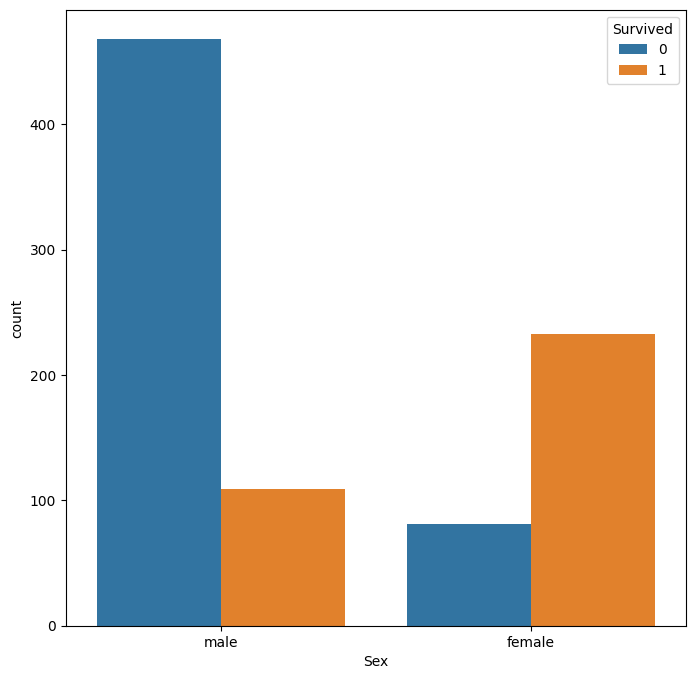

In [220]:
# Check distribution of Sex
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.countplot(df, x="Sex", hue="Survived", ax=ax)
plt.show()

**Observation:**

**Insight:**

**Action:**

In [74]:
# Check Ticket feature
print("Feature: Ticket")
print("---------------")
print(f"Missing values : {df['Ticket'].isna().sum()}")
print(f"Number of unique values : {df['Ticket'].nunique()}")
print(
    "Most frequent : "
    f"{df['Ticket'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature: Ticket
---------------
Missing values : 0
Number of unique values : 681
Most frequent : [7, 'CA. 2343']


In [49]:
# Check five sample elements of Ticket
df["Ticket"].sample(5)

PassengerId
724    250643
375    349909
768    364850
779     36865
589     14973
Name: Ticket, dtype: object

**Observation:**

**Insight:**

**Action:**

In [75]:
# Check Cabin feature
print(f"Feature : Cabin")
print("---------------")
print(f"Missing values : {df['Cabin'].isna().sum()}")
print(f"Number of unique values : {df['Cabin'].nunique()}")
print(
    "Most frequent : "
    f"{df['Cabin'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature : Cabin
----------------
Missing values : 687
Number of unique values : 147
Most frequent : [4, 'B96 B98']


In [56]:
# Check five sample elements of Cabin
df[df["Cabin"].notna()]["Cabin"].sample(5)

PassengerId
430    E10
367    D37
67     F33
660    D48
263    E67
Name: Cabin, dtype: object

**Observation:**

**Insight:**

**Action:**

In [76]:
# Check Embarked feature
print(f"Feature : Embarked")
print("-------------------")
print(f"Missing values : {df['Embarked'].isna().sum()}")
print(f"Number of unique values : {df['Embarked'].nunique()}")
print(
    "Most frequent : "
    f"{df['Embarked'].value_counts(ascending=True).agg(['max', 'idxmax']).tolist()}"
)

Feature : Embarked
-------------------
Missing values : 2
Number of unique values : 3
Most frequent : [644, 'S']


In [58]:
# Check five sample elements of Embarked
df[df["Embarked"].notna()]["Embarked"].sample(5)

PassengerId
759    S
118    S
764    S
349    S
257    C
Name: Embarked, dtype: object

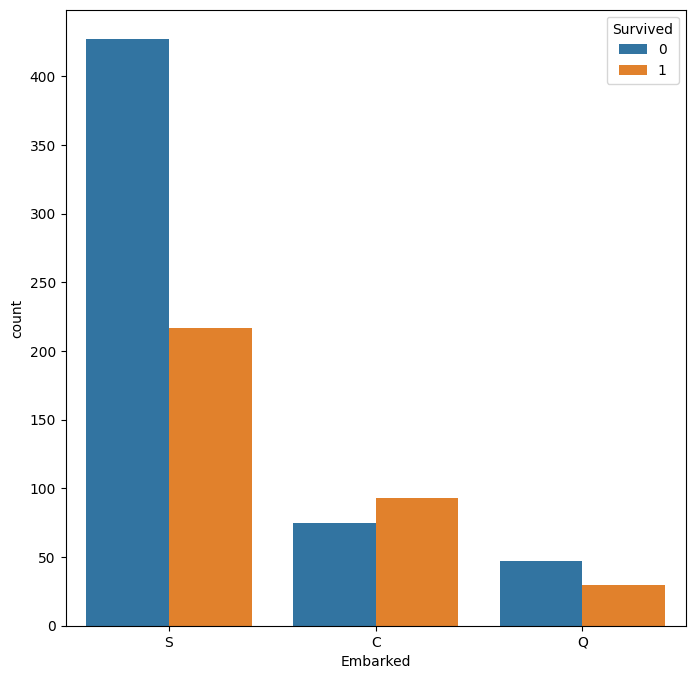

In [221]:
# Check distribtuion of Embarked
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.countplot(df, x="Embarked", hue="Survived", ax=ax)
plt.show()

**Observation:**

**Insight:**

**Action:**

### 1.2 Multivariate Analysis

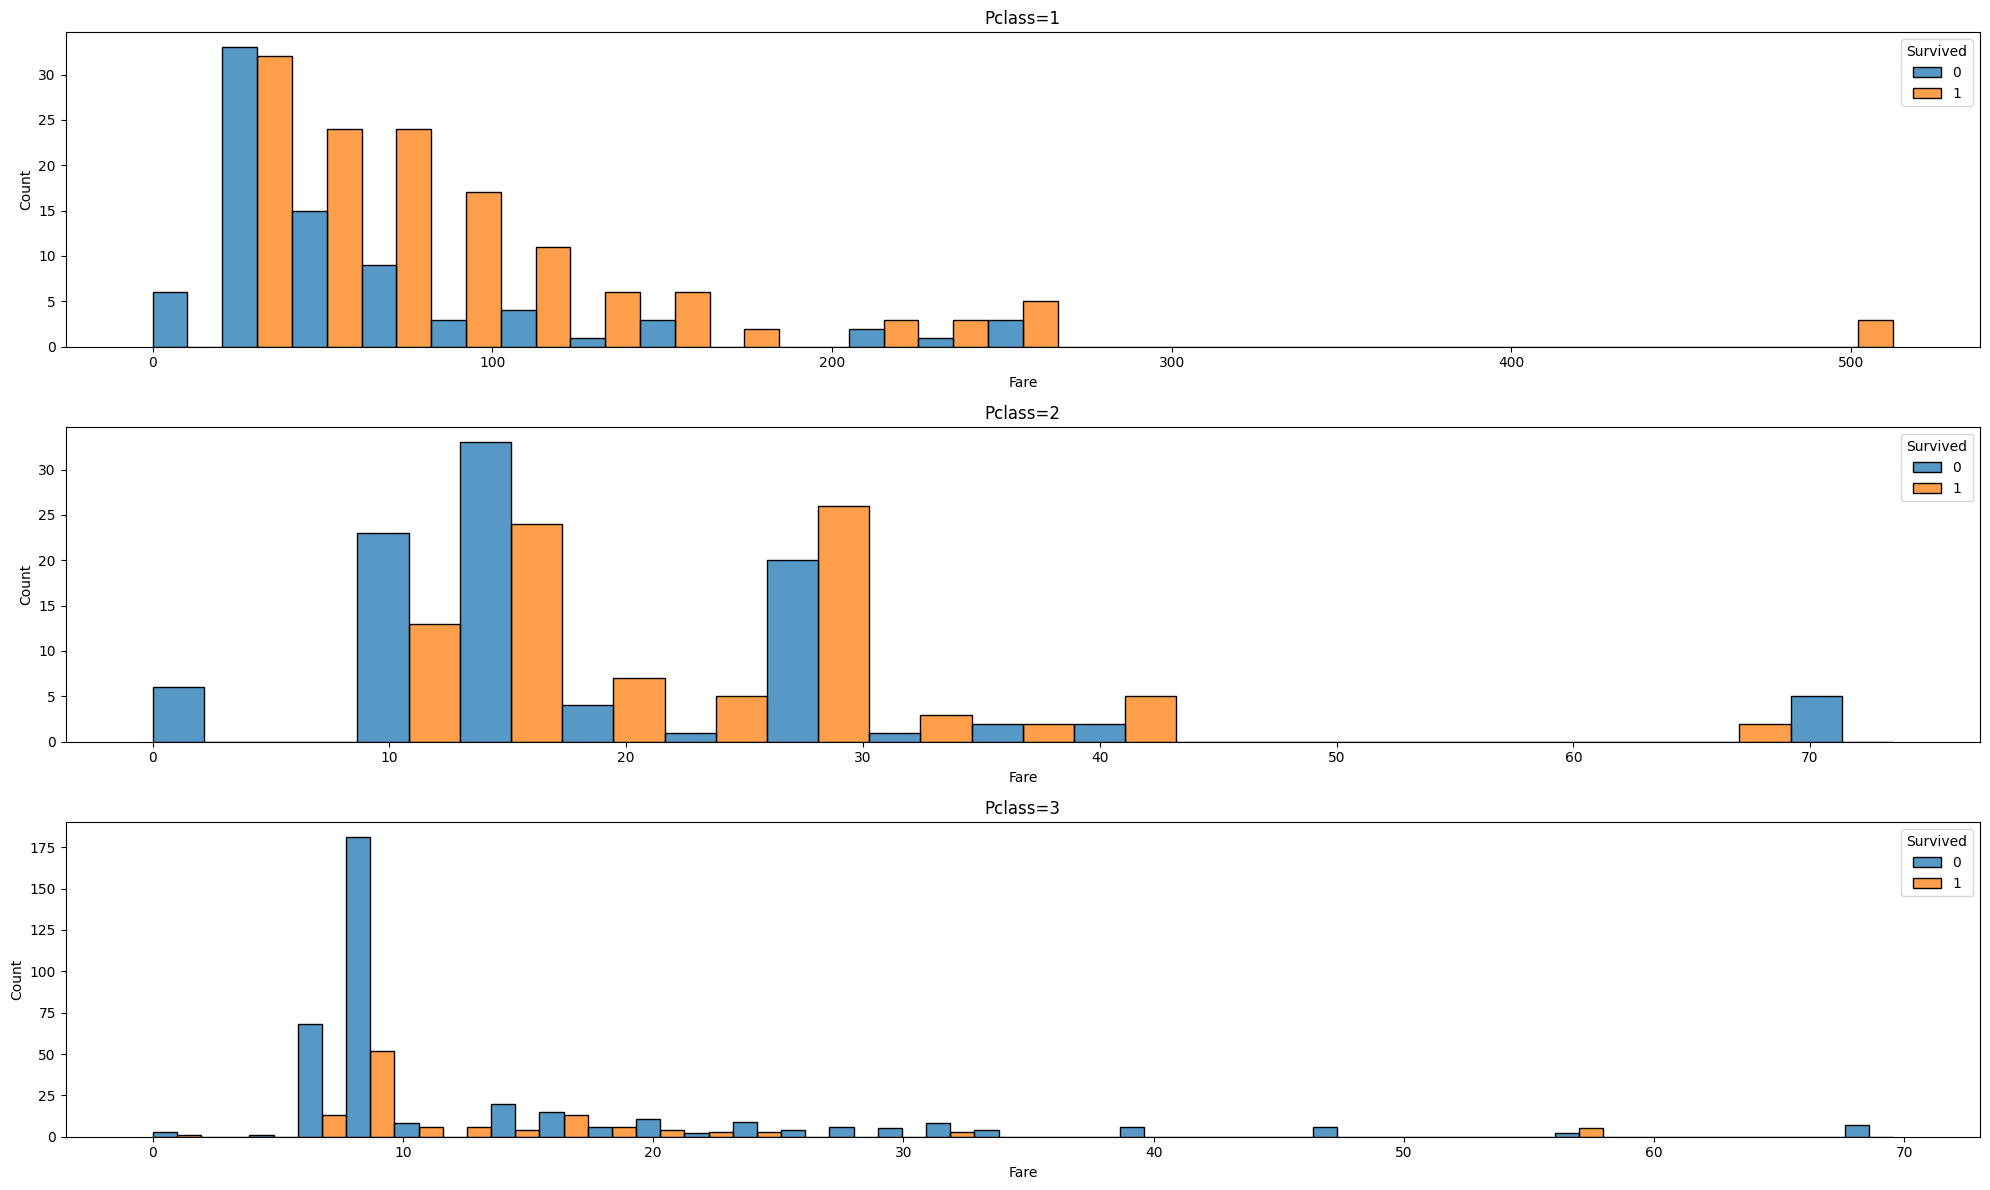

In [147]:
# Check Fare and Pclass features
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))
pclass_group = df.groupby(by="Pclass")[["Fare", "Survived"]]
sns.histplot(pclass_group.get_group(1), x="Fare", hue="Survived", multiple="dodge", ax=axes[0])
sns.histplot(pclass_group.get_group(2), x="Fare", hue="Survived", multiple="dodge", ax=axes[1])
sns.histplot(pclass_group.get_group(3), x="Fare", hue="Survived", multiple="dodge", ax=axes[2])

axes[0].set(title="Pclass=1")
axes[1].set(title="Pclass=2")
axes[2].set(title="Pclass=3")

plt.tight_layout()
plt.show()

**Observation:**

**Insight:**

**Action:**

Number of ticket groups : 134


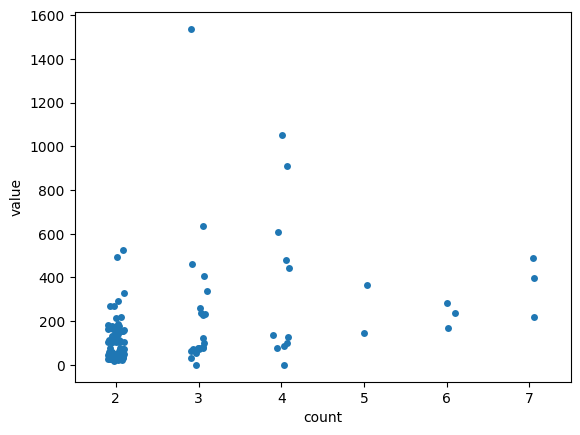

In [195]:
# Check Fare and Ticket features

# Get passenger groups that share the same Ticket
ticket_groups = df.groupby(by="Ticket").filter(lambda x: len(x) > 1).groupby("Ticket")
print(f"Number of ticket groups : {len(ticket_groups.groups)}")

ticket_group_info = ticket_groups["Fare"].agg(["count", "mean"])
ticket_group_info["value"] = ticket_group_info["count"] * ticket_group_info["mean"]
# Produce a scatterplot of the size of each group and their fare
sns.stripplot(ticket_group_info, x="count", y="value")
plt.show()

**Observation:**

**Insight:**

**Action:**

<Axes: >

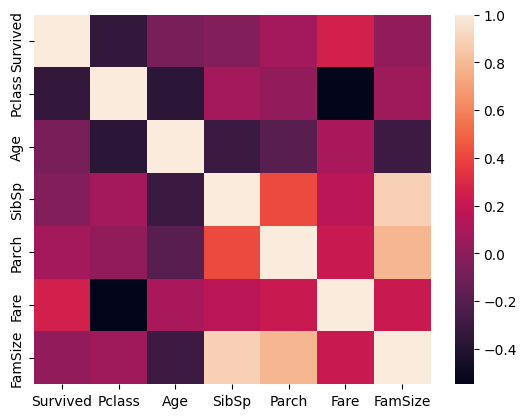

In [197]:
# Visualize the correlation between numeric features
sns.heatmap(df.corr(numeric_only=True))

**Observation:**

- No correlation between `Pclass` and `Fare`

**Insight:**

**Action:**

### 1.3 Summary

**Actions:**

- Impute `Age` using mean and then standardize.
- Convert `Pclass` feature from `number` to `object` and treat as a *cardinal* feature with `categories=[3, 2, 1]`
- Standardize `Fare` feature and impute with mean
- Create `FamilySize` feature from `SibSp` and `Parch` and then drop them. Standardize the resulting `FamilySize` feature
- Drop `Name` feature
- Treat `Sex` as a cardinal feature
- Drop `Ticket` feature
- Drop `Cabin` feature
- Treat `Embarked` as a *cardinal* feature and impute with most frequent

**Alternative Actions:**

## 2. Data Preprocessing

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [234]:
# Helper functions
def drop_features(dfs: list[pd.DataFrame], features: list[str]) -> list[pd.DataFrame]:
    return [df.drop(features, axis=1) for df in dfs]

In [285]:
# Make a copy of train_X, train_y, and test_X
X_train_full = train_X.copy()
y_train_full = train_y.copy()
X_test = test_X.copy()

In [286]:
# Drop the features that are unncessary
X_train_full, X_test = drop_features([X_train_full, X_test], ["Name", "Ticket", "Cabin"])

In [288]:
# Create FamilySize feature from SibSp and Parch
X_train_full["FamilySize"] = X_train_full["SibSp"] + X_train_full["Parch"]
X_test["FamilySize"] = X_test["SibSp"] + X_test["Parch"]

# Drop SibSp and Parch features
X_train_full, X_test = drop_features([X_train_full, X_test], ["SibSp", "Parch"])

In [289]:
# Convert Pclass feature from number to object
X_train_full["Pclass"] = X_train_full["Pclass"].astype("object")
X_test["Pclass"] = X_test["Pclass"].astype("object")

In [301]:
# Split the training dataset into train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Check shape of resulting dataframes
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_valid shape : {X_valid.shape}")
print(f"y_valid shape : {y_valid.shape}")
print(f"X_test shape : {X_test.shape}")

X_train shape : (712, 6)
y_train shape : (712,)
X_valid shape : (179, 6)
y_valid shape : (179,)
X_test shape : (418, 6)


In [302]:
# Create Pipeline to impute and standardized remaining features

# Create numeric feature transformer
numeric_features = ["Age", "Fare", "FamilySize"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Create categorical feature transformer
cardinal_features = ["Sex", "Embarked"]
cardinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first"))
])

ordinal_features = ["Pclass"]
ordinal_categories = [[3, 2, 1]]
ordinal_transformer = Pipeline(steps=[
    ("encoder", OrdinalEncoder(categories=ordinal_categories))
])

preprocessor = ColumnTransformer(transformers=[
    ("numeric_transformer", numeric_transformer, numeric_features),
    ("cardinal_transformer", cardinal_transformer, cardinal_features),
    ("ordinal_transformer", ordinal_transformer, ordinal_features)
], remainder="passthrough")

In [303]:
# Check if the preprocessor works as intended
preprocessor.fit(X_train)

for name, data in [("train", X_train), ("valid", X_valid), ("test", X_test)]:
    print("===========================")
    print(f"Checking for {name} data")
    print("===========================")
    df = pd.DataFrame(preprocessor.transform(data))
    print(f"Missing values : {df.isna().sum().tolist()}")
    print(f"Data types : {df.dtypes.tolist()}")

Checking for train data
Missing values : [0, 0, 0, 0, 0, 0, 0]
Data types : [dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]
Checking for valid data
Missing values : [0, 0, 0, 0, 0, 0, 0]
Data types : [dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]
Checking for test data
Missing values : [0, 0, 0, 0, 0, 0, 0]
Data types : [dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


## 3. Modelling

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [313]:
# Build a baseline model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_jobs=-1, random_state=42, verbose=0))
])

# Fit model on training set
model.fit(X_train, y_train)

# Evaluate model on validation set
model.score(X_valid, y_valid)


0.8268156424581006

In [316]:
# Perform a grid search cross-validation

# Define the parameter grid
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [6, 8, 10, None],
    "model__min_samples_leaf": [1, 3, 5],
    "model__min_samples_split": [2, 4, 6],
}

# Build a grid search model
model_gs = GridSearchCV(model, param_grid=param_grid, cv=3)

# Fit model on the full training dataset
model_gs.fit(X_train_full, y_train_full)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_transformer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'FamilySize']),
                                                                        ('cardinal_transformer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHo...'first'))]),
                                                                         ['Sex',
                                                                          'Embarked']),
                                                                        ('ordinal_transformer',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OrdinalEncoder(categories=[[3,
                                                                                                                      2,
                                                                                                                      1]]))]),
                                                                         ['Pclass'])])),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'model__max_depth': [6, 8, 10, None],
                         'model__min_samples_leaf': [1, 3, 5],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 200, 300]})

In [320]:
# Get best parameters found from grid search
best_params = model_gs.best_estimator_["model"].get_params()
print(f"Best parameters found: {best_params}")

# Instantiate tuned model
model_tuned = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(**best_params))
])

# Fit tuned model on training set
model_tuned.fit(X_train, y_train)

# Evaluate model on validation set
model_tuned.score(X_valid, y_valid)

Best parameters found: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


0.8156424581005587

In [321]:
# Refit tuned model on the full training dataset
model_tuned.fit(X_train_full, y_train_full)

# Make predictions on the test set
predictions = model_tuned.predict(X_test)

In [343]:
from datetime import datetime

# Create submission dataframe
submission = pd.DataFrame({"PassengerId": X_test.index, "Survived": predictions})

# Export submission to a csv
current_time = datetime.now().strftime("%y-%m-%d_%H-%M-%S")
submission_folder_name = "../submissions/"
submission_file_name = "beginner_submission_" + current_time + ".csv"
submission.to_csv(submission_folder_name + submission_file_name, index=False)